
3423. Maximum Difference Between Adjacent Elements in a Circular Array

In [ ]:
class Solution:
    def maxAdjacentDistance(self, nums):
        n = len(nums)
        max_diff = 0
        for i in range(n):
            diff = abs(nums[i] - nums[(i + 1) % n])
            max_diff = max(max_diff, diff)

        return max_diff


In [ ]:
import pandas as pd

class Solution:
    def maxAdjacentDistance(self, nums):
        n = len(nums)
        max_diff = 0
        max_pair = (0, 1)
        for i in range(n):
            diff = abs(nums[i] - nums[(i + 1) % n])
            if diff > max_diff:
                max_diff = diff
                max_pair = (i, (i + 1) % n)
        return max_diff, max_pair

#  Step 1: Read login data from Excel
def read_login_counts(filename):
    login_counts = []
    try:
        # Read Excel file using pandas
        df = pd.read_excel(filename, engine='openpyxl')
        # Check if 'login_count' column exists
        if 'login_count' not in df.columns:
            print("Error: 'login_count' column not found in Excel file.")
            return []
        # Extract login_count column and convert to integers
        for value in df['login_count']:
            try:
                login_counts.append(int(value))
            except ValueError:
                print(f"Error: Invalid integer in 'login_count': {value}")
        return login_counts
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return []
    except ValueError as e:
        print(f"Error: Invalid data in Excel file: {str(e)}")
        return []
    except Exception as e:
        print(f"Unexpected error: {str(e)}")
        return []

#  Step 2: Detect anomaly
filename = r"E:\Workstation\Coding\Python\Leetcode\Leetcode_SOL_with_Real_World_Problems\logins.csv"
login_data = read_login_counts(filename)

# Check if login_data is empty (due to errors)
if not login_data:
    print("No valid login data to process. Exiting.")
else:
    detector = Solution()
    max_diff, (h1, h2) = detector.maxAdjacentDistance(login_data)

    #  Step 3: Show result
    print(f"Login counts: {login_data}")
    print(f"⚠️ Max spike from hour {h1} to {h2} → Difference = {max_diff}")

    # Optional: Alert if it’s too big
    if max_diff > 100:
        print("🚨 ALERT: Unusual login activity detected!")
    else:
        print("✅ Login pattern is normal.")

Login counts: [122, 11, 222, 124, 33333, 222]
⚠️ Max spike from hour 3 to 4 → Difference = 33209
🚨 ALERT: Unusual login activity detected!


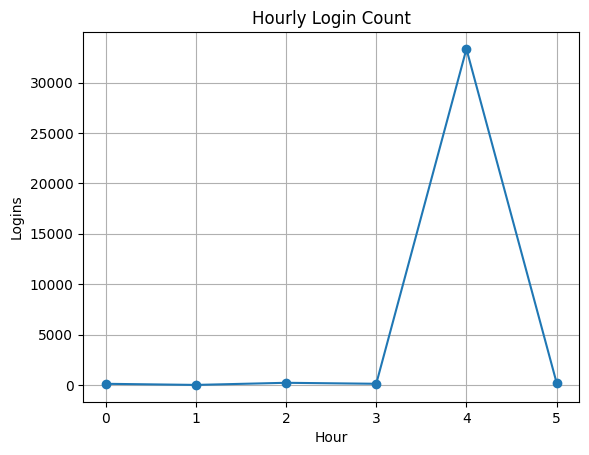

In [13]:
import matplotlib.pyplot as plt

hours = list(range(len(login_data)))  # Use login_data instead of login_counts
plt.plot(hours, login_data, marker='o')
plt.title("Hourly Login Count")
plt.xlabel("Hour")
plt.ylabel("Logins")
plt.grid(True)
plt.show()
